In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
dataset = pd.read_excel('WWC2017.xlsx')
dataset.isnull().sum()

Name             0
Country          0
Overall_Score    0
Rank             0
A_Score          0
B_Score          0
C_Score          0
Time             0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           207 non-null    object 
 1   Country        207 non-null    object 
 2   Overall_Score  207 non-null    float64
 3   Rank           207 non-null    int64  
 4   A_Score        207 non-null    float64
 5   B_Score        207 non-null    float64
 6   C_Score        207 non-null    float64
 7   Time           207 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 13.1+ KB


In [12]:
df = dataset.drop(['Name','Country'], axis=1)

In [13]:
df.describe()

,Overall_Score,Rank,A_Score,B_Score,C_Score,Time
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,9.021353,18.801932,4.734300,2.467729,1.819324,1.334686
std,0.611582,11.740908,0.246593,0.160875,0.297830,0.116539
min,5.700000,1.000000,3.500000,1.700000,0.200000,1.210000
25%,8.740000,9.000000,4.600000,2.370000,1.700000,1.280000
50%,9.170000,18.000000,4.800000,2.490000,2.000000,1.320000
75%,9.450000,27.000000,4.900000,2.600000,2.000000,1.370000
max,9.720000,50.000000,5.000000,2.720000,2.000000,2.370000


In [14]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm

,Overall_Score,Rank,A_Score,B_Score,C_Score,Time
0,0.995025,0.000000,1.000000,0.980392,1.000000,0.163793
1,0.980100,0.020408,1.000000,0.921569,1.000000,0.043103
2,0.977612,0.040816,1.000000,0.911765,1.000000,0.034483
3,0.975124,0.061224,1.000000,0.901961,1.000000,0.172414
4,0.965174,0.081633,1.000000,0.862745,1.000000,0.051724
...,...,...,...,...,...,...
202,0.711443,0.448980,0.733333,0.696078,0.750000,0.198276
203,0.706468,0.469388,0.733333,0.676471,0.750000,0.043103
204,0.689055,0.489796,0.600000,0.607843,0.861111,0.068966
205,0.684080,0.510204,0.733333,0.980392,0.527778,0.206897


In [16]:
wcss = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    wcss.append(km.inertia_)

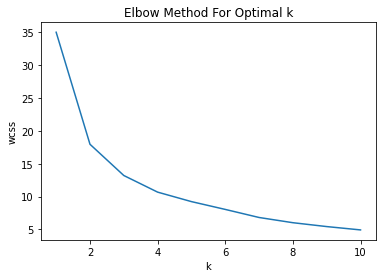

In [17]:
plt.plot(K, wcss)
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
clustering = KMeans(n_clusters=2)
clustering.fit(df_norm)

KMeans(n_clusters=2)

In [31]:
KMeans.cluster_centers_

AttributeError: type object 'KMeans' has no attribute 'cluster_centers_'

In [28]:
dataset['Cluster'] = clustering.labels_
dataset

,Name,Country,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,Cluster
0,Zhizhao Chang,CHN,9.70,1,5.0,2.70,2.00,1.40,1
1,Achmad Hulaefi,INA,9.64,2,5.0,2.64,2.00,1.26,1
2,Pavel Muratov,RUS,9.63,3,5.0,2.63,2.00,1.25,1
3,Wai Kin Yeap,MAS,9.62,4,5.0,2.62,2.00,1.41,1
4,Hibiki Betto,JPN,9.58,5,5.0,2.58,2.00,1.27,1
...,...,...,...,...,...,...,...,...,...
202,Leslie Kwan,CAN,8.56,23,4.6,2.41,1.55,1.44,0
203,Aditya Kumar,IND,8.54,24,4.6,2.39,1.55,1.26,0
204,Dan Rio Rodriguez,ESP,8.47,25,4.4,2.32,1.75,1.29,0
205,Yaowen Zhang,CHN,8.45,26,4.6,2.70,1.15,1.45,0


C:\Users\Salmanaf7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


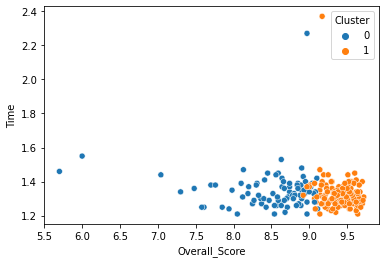

In [29]:
sns.scatterplot(dataset['Overall_Score'], dataset['Time'], hue='Cluster', data=dataset)
plt.show()